In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("iris.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
class_names = df['Species'].unique()
print(class_names)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
values = df['Species'].value_counts()
print(values)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


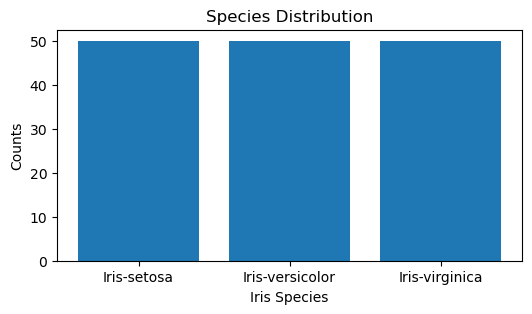

In [6]:
plt.figure(figsize=(6,3))
plt.bar(x=class_names, height=values)
plt.xlabel('Iris Species')
plt.ylabel('Counts')
plt.title('Species Distribution')
plt.savefig("plot.svg", format="SVG")
plt.show()

In [6]:
X = df.drop(columns=['Species'])
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
acc = accuracy_score(y_test, y_preds)
print("Accuracy = ", acc*100)

Accuracy =  100.0


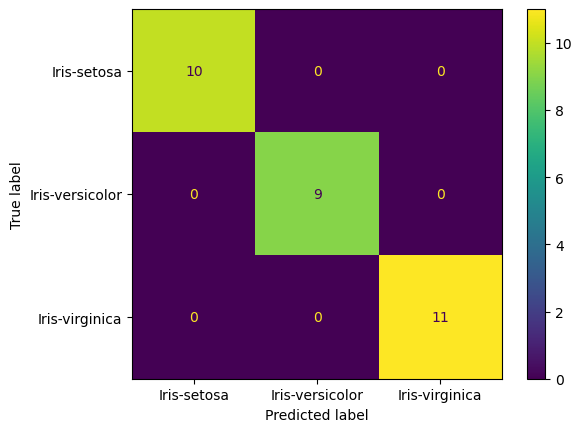

In [11]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_plot.plot()
plt.savefig('cm_plot.png')
plt.show()

In [10]:
import joblib
joblib.dump(knn, 'model.joblib')
print("SUCESS")

SUCESS


In [11]:
sample = [[5,3,1.6,0.2]]
answer = knn.predict(sample)
print(answer[0])

Iris-setosa


C:\Users\Acer Nitro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
